# Talent Analysis

#### How does the presence of a popular director affect the popularity of a movie?

##### Cleaning and Merging Data 

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
preprocessed_df = pd.read_csv("standardized.csv")
credits_df = pd.read_csv("credits.csv")

# Merge the dataset on the "id" column
merged_df = pd.merge(preprocessed_df, credits_df[credits_df['role'] == 'DIRECTOR'], on='id', how='left')

# Remove columns that are unnecessary
directer_related_columns = ['id', 'name', 'title', 'imdb_score','tmdb_score','imdb_votes',
                            'tmdb_popularity','nor_imdb_vote','nor_tmdb_popularity','weighted_average_popularity']
director_df = merged_df[directer_related_columns]

# Display the first few rows of the director_csv
director_df_head = director_df.head()
director_df_head

# export as a new csv file
director_df.to_csv('director_df.csv', index=False)


##### Identify popular directors by counting the number of movies that director has directed on Netflix 

In [19]:
# NOTE: a movie can be directed by multiple directors
# counting the number of movies the director has directed
movie_counts = director_df['name'].value_counts()

# In our report, top 15% will be identified as popular directors 
threshold = movie_counts.quantile(0.85)

# Identify popular directors based on the threshold
popular_directors = movie_counts[movie_counts > threshold].index.tolist()

# Display the popular directors and their movie counts
popular_directors_df = movie_counts[movie_counts > threshold]
popular_directors_df_head = popular_directors_df.head()
popular_directors_df_head


name
Raúl Campos     20
Jan Suter       19
Ryan Polito     15
Jay Karas       14
Marcus Raboy    14
Name: count, dtype: int64

#### Analyse the mean for 'weighted_average_popularity' for all movies a director has directed 
#### compare popular vs unpopular

In [20]:
# Calculate the average 'weighted_average_popularity' for movies directed by popular directors
popular_directors_avg_popularity = merged_df[merged_df['name'].isin(popular_directors)]['weighted_average_popularity'].mean()

# Calculate the average 'weighted_average_popularity' for movies directed by other directors
other_directors_avg_popularity = merged_df[~merged_df['name'].isin(popular_directors)]['weighted_average_popularity'].mean()

popular_directors_avg_popularity, other_directors_avg_popularity

(0.49521058965102294, 0.5059356814701379)

Surprisingly, the movies directed by popular directors have a slightly lower average popularity score compared to those directed by other directors. However, the difference is not substantial.

There could be various reasons for this. For instance:

- The definition of "popular" was based solely on the number of movies directed. This might not directly translate to quality or audience reception.
- Some popular directors might have directed many smaller, niche movies that might not have broad appeal.

#### Visualisation

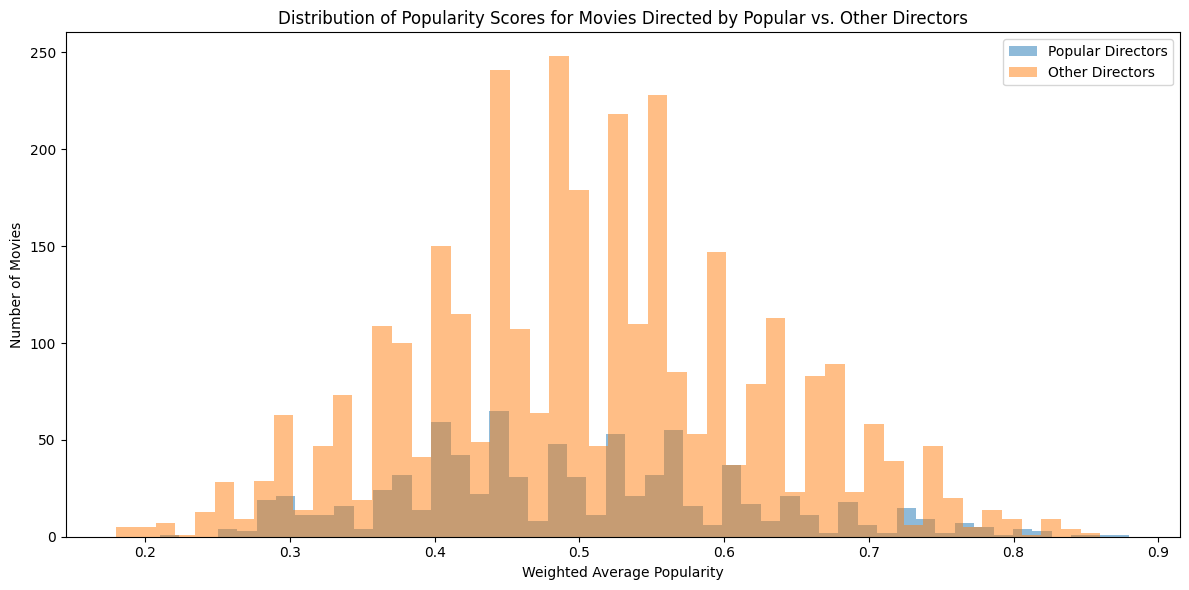

In [24]:
import matplotlib.pyplot as plt

# Data for plotting
popular_movies_popularity = director_df[director_df['name'].isin(popular_directors)]['weighted_average_popularity']
other_movies_popularity = director_df[~director_df['name'].isin(popular_directors)]['weighted_average_popularity']

# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.hist(popular_movies_popularity, bins=50, alpha=0.5, label='Popular Directors', histtype='stepfilled')
plt.hist(other_movies_popularity, bins=50, alpha=0.5, label='Other Directors', histtype='stepfilled')
plt.title('Distribution of Popularity Scores for Movies Directed by Popular vs. Other Directors')
plt.xlabel('Weighted Average Popularity')
plt.ylabel('Number of Movies')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\R99t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\R99t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\R99t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

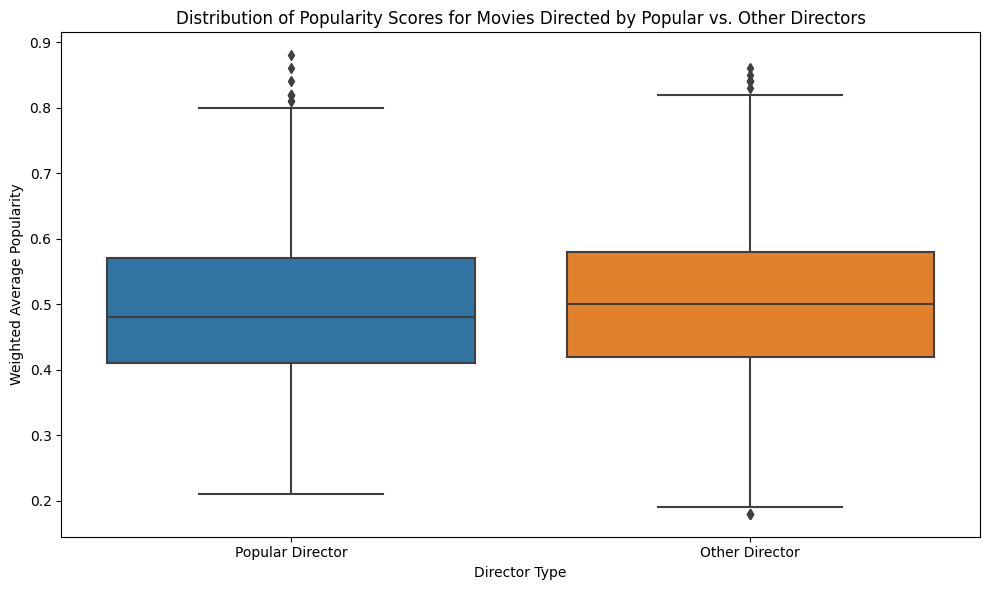

In [26]:
import seaborn as sns

# Create a dataframe for plotting
plot_df = director_df.copy()
plot_df['Director_Type'] = ['Popular Director' if name in popular_directors else 'Other Director' for name in plot_df['name']]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Director_Type', y='weighted_average_popularity', data=plot_df)
plt.title('Distribution of Popularity Scores for Movies Directed by Popular vs. Other Directors')
plt.ylabel('Weighted Average Popularity')
plt.xlabel('Director Type')
plt.tight_layout()
plt.show()


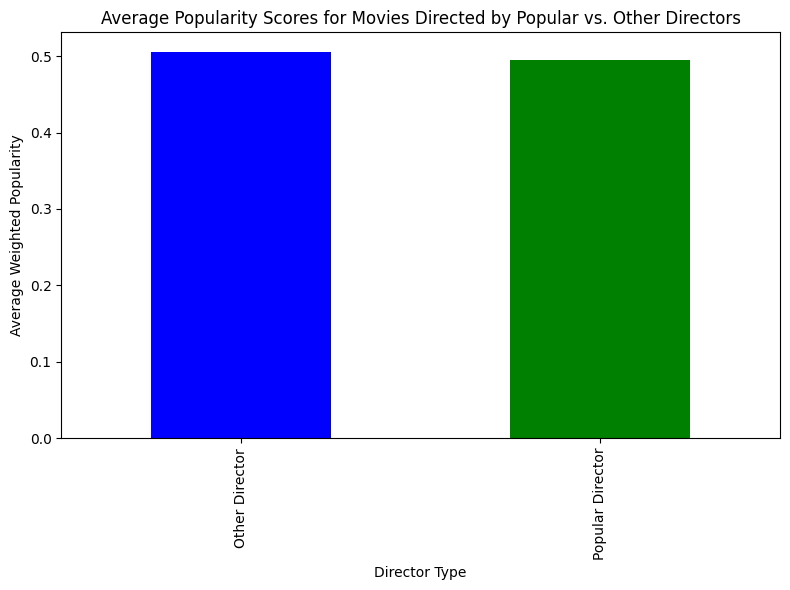

In [28]:
import seaborn as sns

# Calculate the average popularity for each director type
avg_popularity = plot_df.groupby('Director_Type')['weighted_average_popularity'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
avg_popularity.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Popularity Scores for Movies Directed by Popular vs. Other Directors')
plt.ylabel('Average Weighted Popularity')
plt.xlabel('Director Type')
plt.tight_layout()
plt.show()



#### Further Analysis: What if I combine the score of both the number of moives the director has directed and the rating of the movies